# Imporar bibliotecas necesarias


In [33]:

import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report  
import matplotlib.pyplot as plt  
import seaborn as sns 

%matplotlib inline

# Cargar dataset titanic online


In [23]:

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocesar data


In [ ]:
# Completo valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)  
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
df['Fare'].fillna(df['Fare'].median(), inplace=True)  

# Genero dummies para categoricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)  

# Descarto columnas innecesarias
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)  

# Normalizo las variables numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])  # Scale numerical features



In [25]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True


# Separar en train y test


In [26]:
#Defino target y variables predictoras
X = df.drop('Survived', axis=1)  # Variables
y = df['Survived']  # Target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veo las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

# Entrenar modelo


In [31]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar resultados
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Evaluar en profundidad


Precision: 0.81
Recall: 0.74


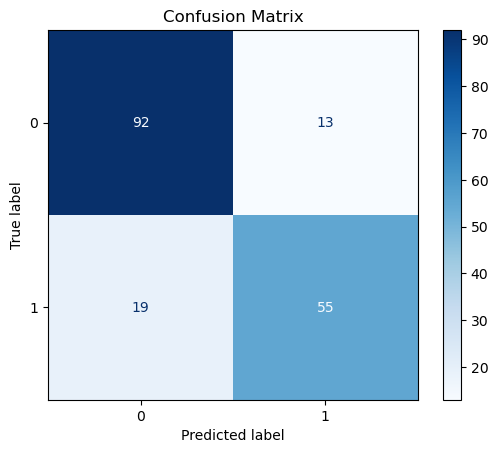

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Calcular precision y recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()